<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 180px;margin-top:50px;margin-bottom:50px;" align="left">
   <div style= "font-size: 28px;font-weight:bold;margin-top:20px;margin-bottom:20px;margin-left:360px;margin-right:140px; line-height: 1.1;color:#6f800f;"><center>Data Mining Project | ABCDEats Inc.</center></div>
   <div style= "font-size: 17px;font-weight:bold;"><center>Fall Semester | 2024 - 2025</center></div>
   <div><center><b>Master in Data Science and Advanced Analytics</b> </center></div>
 <br>
    <div><center>André Silvestre, 20240502 </center></div>
    <div><center>Filipa Pereira, 20240509 </center></div>
    <div><center>Umeima Mahomed, 20240543 </center></div>
    <br>
    <div><center><b>Group 37</b></center></div>
 <br>

<div style="background: linear-gradient(to right,#6f800f, #6f800f); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## Introduction

The purpose of this project is to analyze the data of **ABCDEats Inc.**, ....


## Data Description

Each row corresponds to one customer, and the column descriptions are given below:

|                                   Column Name                                   | Description                                                                                         |
|:-------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------|
|                                **`customer_id`**                                | Unique identifier for each customer.                                                                |
|                              **`customer_region`**                              | Geographic region where the customer is located.                                                    |
|                               **`customer_age`**                                | Age of the customer.                                                                                |
|                               **`vendor_count`**                                | Number of unique vendors the customer has ordered from.                                             |
|                               **`product_count`**                               | Total number of products the customer has ordered.                                                  |
|                                 **`is_chain`**                                  | Indicates whether the customer’s order was from a chain restaurant.                                 |
|                                **`first_order`**                                | Number of days from the start of the dataset when the customer first placed an order.               |
|                                **`last_order`**                                 | Number of days from the start of the dataset when the customer most recently placed an order.       |
|                                **`last_promo`**                                 | The category of the promotion or discount most recently used by the customer.                       |
|                              **`payment_method`**                               | Method most recently used by the customer to pay for their orders.                                  |
| **`CUI_American`**, **`CUI_Asian`**, **`CUI_Chinese`**, **`CUI_Italian`**, etc. | The amount in monetary units spent by the customer from the indicated type of cuisine.              |
|                           **`DOW_0`** to **`DOW_6`**                            | Number of orders placed on each day of the week (**`0`** = **Sunday**, **`6`** = **Saturday**).     |
|                            **`HR_0`** to **`HR_23`**                            | Number of orders placed during each hour of the day (**`0`** = **midnight**, **`23`** = **11 PM**). |

<div style="background: linear-gradient(to right,#6f800f, #6f800f); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## 📚 Libraries Import

In [33]:
# For data
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import missingno as msno
from ydata_profiling import ProfileReport

# For data preprocessing
from sklearn.model_selection import train_test_split

# For model evaluation

# For clustering


# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='1'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#bEd62f, #6f800f); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 1 | Exploratory Data Analysis</b></h1></center>
</div>

In [3]:
# Importing the dataset
ABCDEats = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

In [4]:
# Display the first 5 rows
ABCDEats.head() 

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 31888
Number of columns : 56


In [6]:
# Check for missing values in the dataset (n = number of missing values & % = percentage of missing values)
pd.DataFrame({'n NAs': ABCDEats.isnull().sum(), 
              '% NAs': round(ABCDEats.isnull().mean() * 100,2)})

,n NAs,% NAs
customer_id,0,0.00
customer_region,0,0.00
customer_age,727,2.28
vendor_count,0,0.00
product_count,0,0.00
is_chain,0,0.00
first_order,106,0.33
last_order,0,0.00
last_promo,0,0.00
payment_method,0,0.00


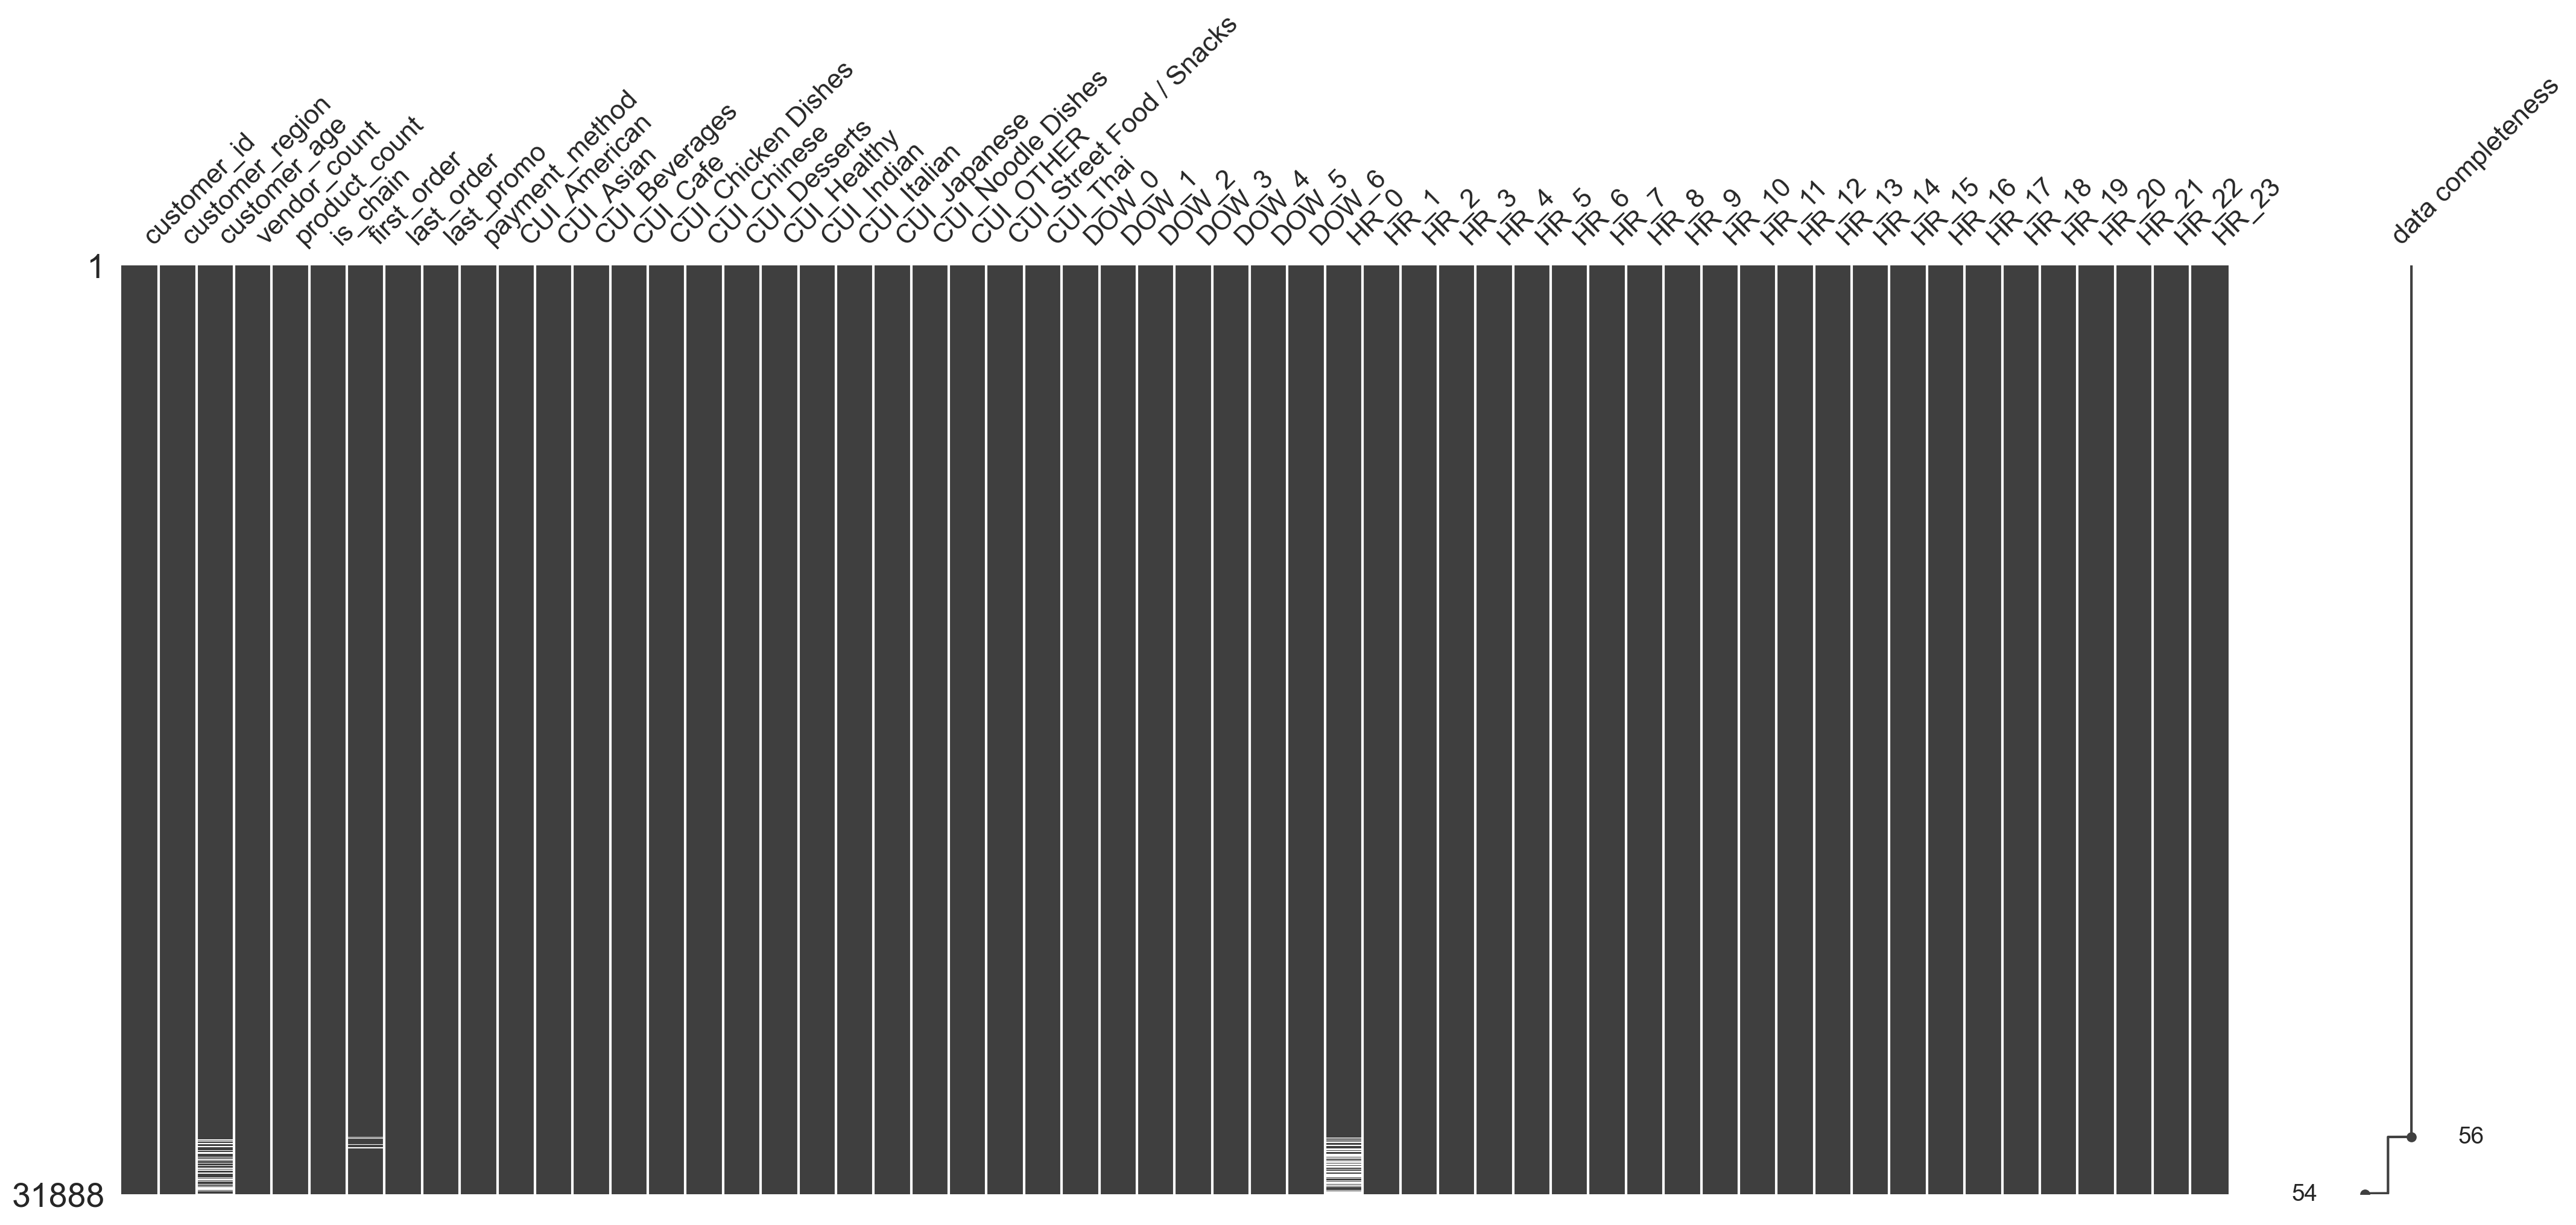

In [7]:
# Visualize the missing values in the dataset
msno.matrix(ABCDEats, labels=True, sort="descending");

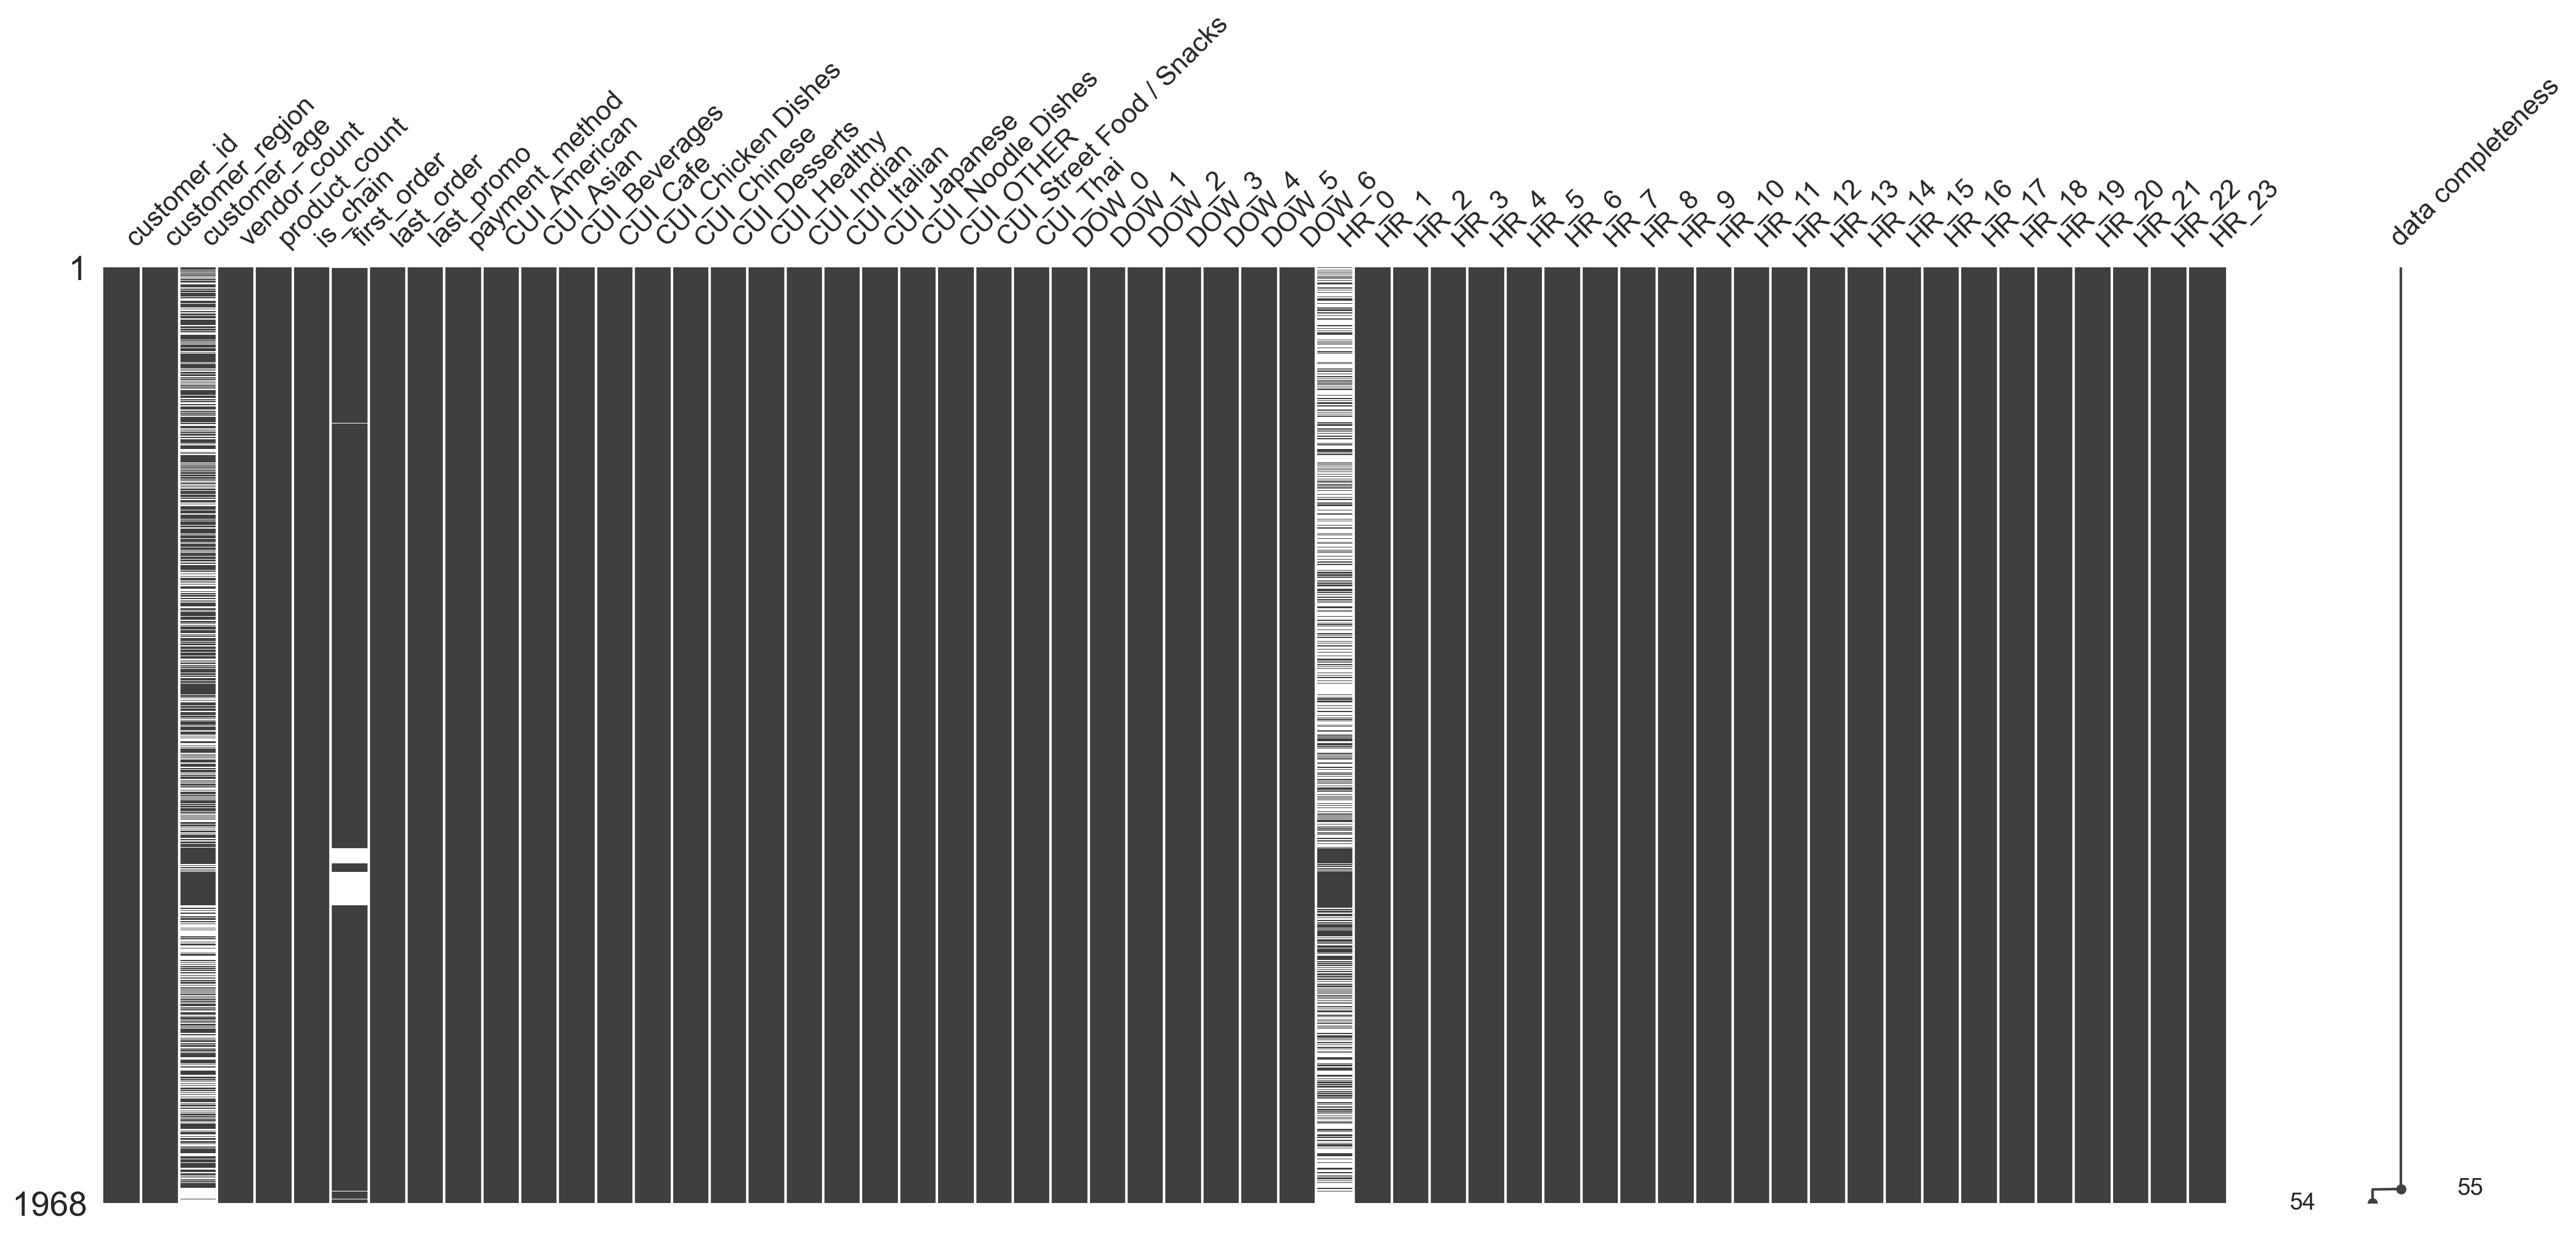

In [8]:
# Visualize the missing values only on the rows with missing values
msno.matrix(ABCDEats[ABCDEats.isnull().any(axis=1)], labels=True, sort="descending");

In [9]:
# Check for duplicates rows by costumer_id
ABCDEats.duplicated().sum()
# ABCDEats.duplicated('customer_id').sum() # it is the same

13

In [10]:
# Drop duplicates
ABCDEats.drop_duplicates(inplace=True)

---

In [11]:
# Check the data types
ABCDEats.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [13]:
# Descriptive statistics
round(ABCDEats.describe(include="all").T, 2) 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,31875,31875,1b8f824d5e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_region,31875,9,8670,9761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,31148.0,NaN,NaN,NaN,27.507545,7.161828,15.0,23.0,26.0,31.0,80.0
vendor_count,31875.0,NaN,NaN,NaN,3.102714,2.771753,0.0,1.0,2.0,4.0,41.0
product_count,31875.0,NaN,NaN,NaN,5.668424,6.957933,0.0,2.0,3.0,7.0,269.0
is_chain,31875.0,NaN,NaN,NaN,2.819357,3.977977,0.0,1.0,2.0,3.0,83.0
first_order,31769.0,NaN,NaN,NaN,28.469924,24.104626,0.0,7.0,22.0,45.0,90.0
last_order,31875.0,NaN,NaN,NaN,63.672376,23.227992,0.0,49.0,70.0,83.0,90.0
last_promo,31875,4,-,16744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,31875,3,CARD,20153,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Check the unique values of each column
for col in ABCDEats.columns[1:]:
    print(f'\033[1m{col}\033[0m[{ABCDEats[col].nunique()}]: {sorted(ABCDEats[col].unique())} \n')

customer_region[9]: ['-', '2360', '2440', '2490', '4140', '4660', '8370', '8550', '8670'] 

customer_age[66]: [15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 33.0, 38.0, nan, 27.0, 32.0, 34.0, 35.0, 36.0, 37.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0] 

vendor_count[37]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 40, 41] 

product_count[93]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 79, 80, 81, 8

In [15]:
# With the unique values of each column, we can see that there are some columns with values represented by '-' 
# and some columns with values that are not in the domain of the column.

# Let's check the columns with values represented by '-' in the columns 'customer_region' and 'last_promo'
print(len(ABCDEats[ABCDEats['customer_region'] == '-'])) 
print(len(ABCDEats[ABCDEats['last_promo'] == '-'])) # last_promo '-' can be considered as don't have a promo

442
16744


In [16]:
# Check if first_order is before last_order
(ABCDEats['first_order'] > ABCDEats['last_order']).sum() # No rows with first_order > last_order 

0

---

## 📊 Data Visualization

In [18]:
numerical_cols = ABCDEats.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ABCDEats.select_dtypes(include=['object']).columns

print(f'Numerical columns: {len(numerical_cols)}, {numerical_cols} \n')
print(f'Categorical columns: {len(categorical_cols)}, {categorical_cols}')

Numerical columns: 52, Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object') 

Categorical columns: 4, Index(['customer_id', 'customer_region', 'last_promo', 'payment_method'], dtype='object')


In [22]:
print(list(ABCDEats[numerical_cols[:21]].columns))

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']


In [34]:
# Pairwise Relationship of Numerical Variables and save the plot
sns.pairplot(ABCDEats[numerical_cols[:21]], diag_kind='hist')
plt.savefig('EDA/pairwise_relationship.png', format='png')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000014580151C60> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



## Inicial Analysis of the Data

In [1]:
# # Generate the profile report of the dataset -> It takes a long time to run so we will save the report in a .html file
# profile = ProfileReport(ABCDEats, title="Profile Report | ABDCEats Inc.", explorative=True)
# profile.to_file(os.path.join('..', '..', "EDA/DM2425_Part1_37_ProfileReport.html"))

### Alerts by the Profile Report 

- **`customer_region`**: 1 unique value (-) which is a missing value.

---

### `Number of Orders`

> First of all, we detected that we don't have the number of orders placed by the customers. After some ***data understanding*** we found that we can calculate the total number of orders placed by each customer by summing the columns `DOW_0` to `DOW_6` or `HR_0` to `HR_23`, in theory. 

In [24]:
# Through these variables we can know what number of orders are placed in total by summing all the columns 'DOW_0' to 'DOW_6' or 'HR_0' to 'HR_23'
Total_Orders_DOW = ABCDEats.loc[:, 'DOW_0':'DOW_6'].sum().sum()
Total_Orders_DOW

139263

In [25]:
# Check if the sum of the columns 'HR_0' to 'HR_23' is equal to the total number of orders
Total_Orders_HR = ABCDEats.loc[:, 'HR_0':'HR_23'].sum().sum()
Total_Orders_HR

137711.0

In [26]:
# Difference between the sum of the columns 'HR_0' to 'HR_23' and the sum of the columns 'DOW_0' to 'DOW_6'
Total_Orders_HR - Total_Orders_DOW

-1552.0

In [27]:
# Check how many NA values are in the columns 'DOW_0' to 'DOW_6' and 'HR_0' to 'HR_23'
print(ABCDEats.loc[:, 'DOW_0':'DOW_6'].isnull().sum().sum())
print(ABCDEats.loc[:, 'HR_0':'HR_23'].isnull().sum().sum())

0
1164


> The sum of the columns **`HR_0`** to **`HR_23`** is not equal to the sum of the columns **`DOW_0`** to **`DOW_6`**. This is a problem of **data inconsistency**. 

- After some analysis, we can see that **`HR_0`** don't have any value greater than 0.

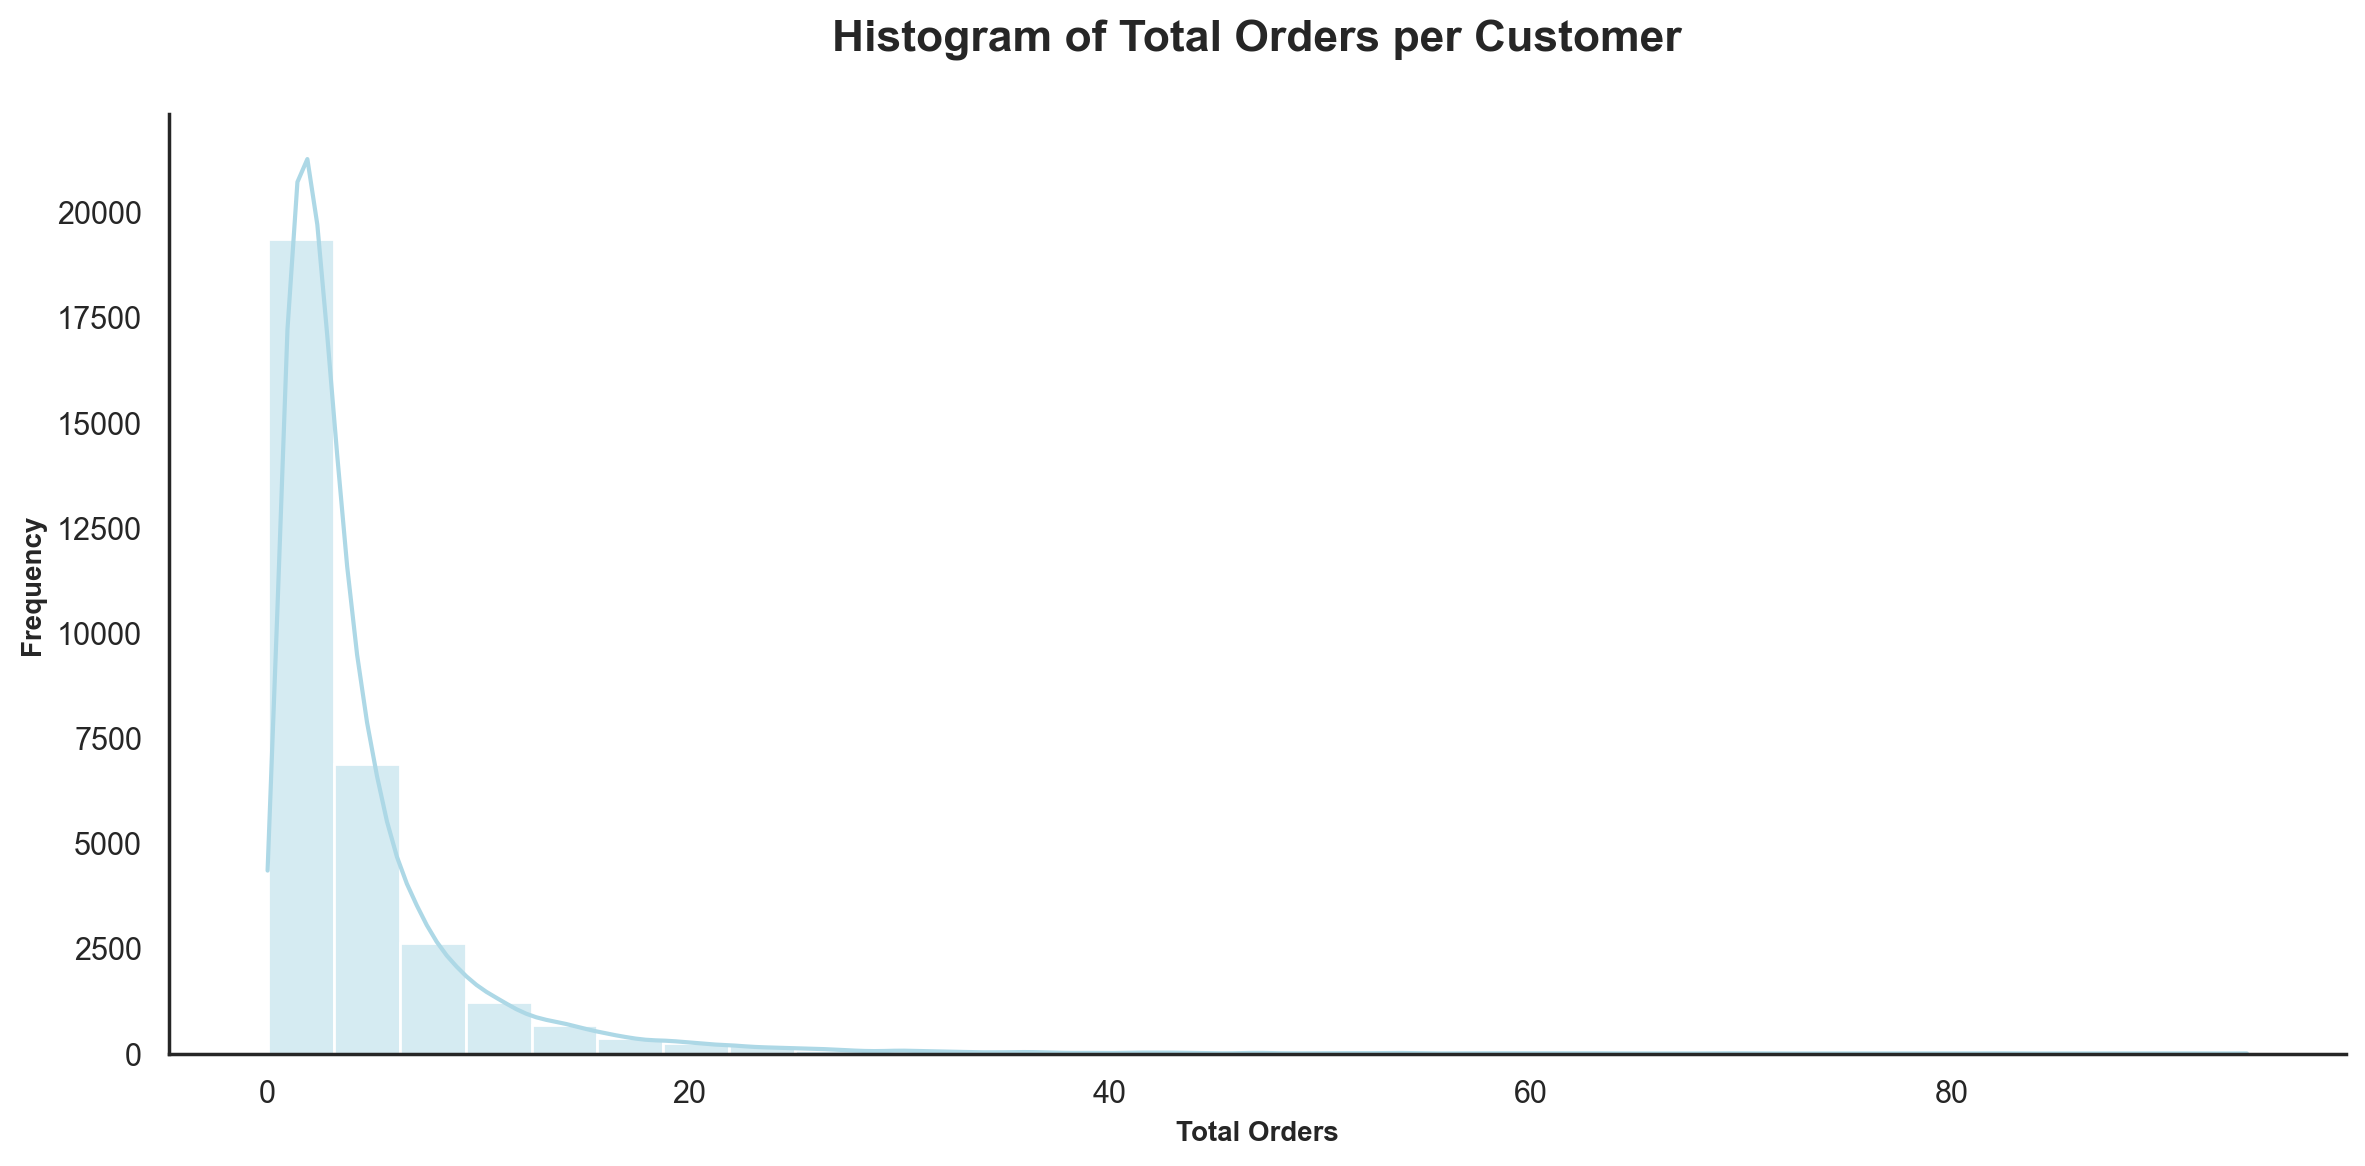

In [28]:
# Total Orders per Customer
ABCDEats['Total_Orders'] = ABCDEats.loc[:, 'DOW_0':'DOW_6'].sum(axis=1)

# Check the distribution of the total number of orders placed by each customer
plt.figure(figsize=(12, 6))
sns.histplot(ABCDEats['Total_Orders'], bins=len(ABCDEats['Total_Orders'].unique()), color='lightblue', kde=True)                 ############ POR EM %
plt.title('Histogram of Total Orders per Customer\n', fontweight='bold', fontsize=16)
plt.xlabel('Total Orders', fontweight='bold', fontsize=10)
plt.ylabel('Frequency', fontweight='bold', fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

---

#### `customer_region`

In [17]:
# Unique values of the column `customer_region`
print(ABCDEats['customer_region'].unique())

['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']


In [18]:
# Absolute and Relative Frequency Table of the column `customer_region`
customer_region_n_freq = ABCDEats['customer_region'].value_counts().reset_index()
customer_region_n_freq.columns = ['customer_region', 'n']
customer_region_n_freq['%'] = round(customer_region_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
customer_region_n_freq.set_index('customer_region', inplace=True)
pd.DataFrame(customer_region_n_freq.sort_values(by='n', ascending=False))

,n,%
customer_region,,
8670,9761,30.62
4660,9550,29.96
2360,8829,27.70
2440,1483,4.65
4140,857,2.69
8370,495,1.55
2490,445,1.40
-,442,1.39
8550,13,0.04


> The column `customer_region` has a value represented by `-` which is a missing value. We can replace that value with some technique like imputation or treat it as a 'NaN' value.

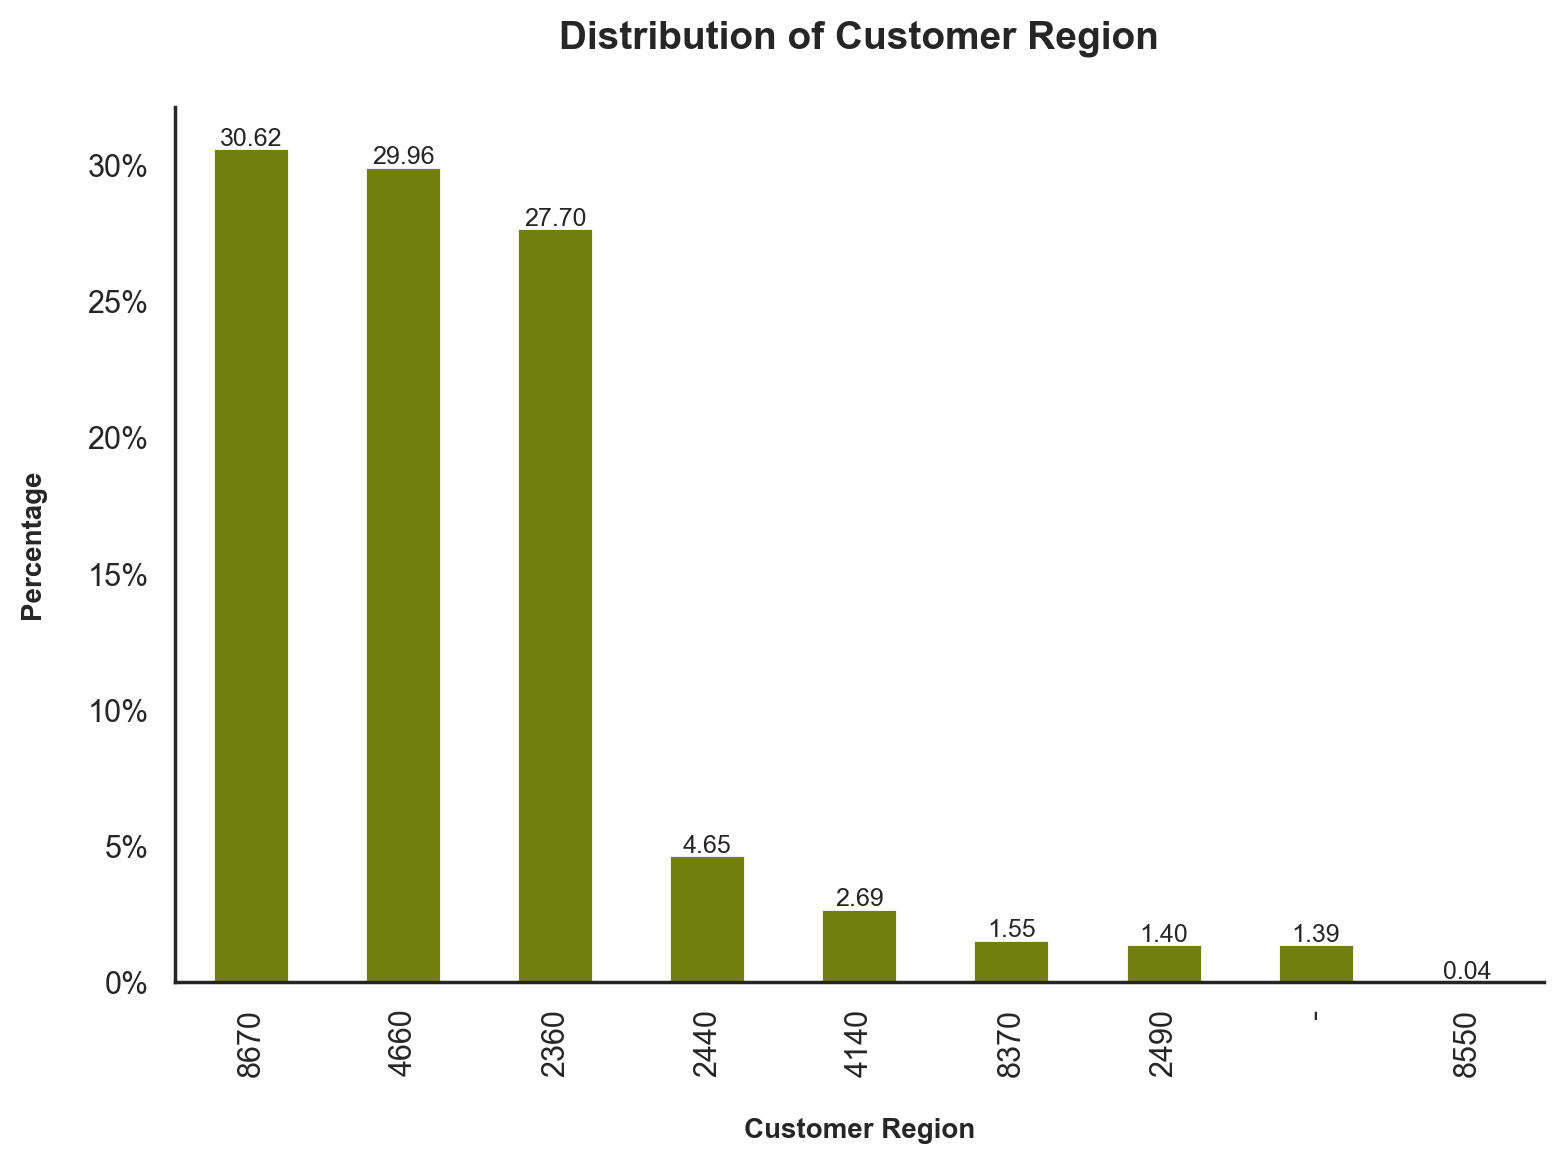

In [56]:
# Barplot representing the distribution of the '
ABCDEats['customer_region'].value_counts(normalize=True).plot(kind='bar', color='#6f800f', figsize=(8, 6))

plt.title('Distribution of Customer Region\n', fontsize=14, fontweight='bold')
plt.xlabel('\nCustomer Region', fontsize=10, fontweight='bold')
plt.ylabel('Percentage\n', fontsize=10, fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Display the percentage on the top of each bar
for i in range(len(ABCDEats['customer_region'].value_counts(normalize=True))):
    value = ABCDEats['customer_region'].value_counts(normalize=True).iloc[i]
    plt.text(i, value+0.001, f'{value*100:.2f}', ha='center', fontsize=9)  
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

## MAYBE POR AS MENOS FREQUENTES NUMA CLASSE DE "OUTRAS REG."


#### `customer_age`

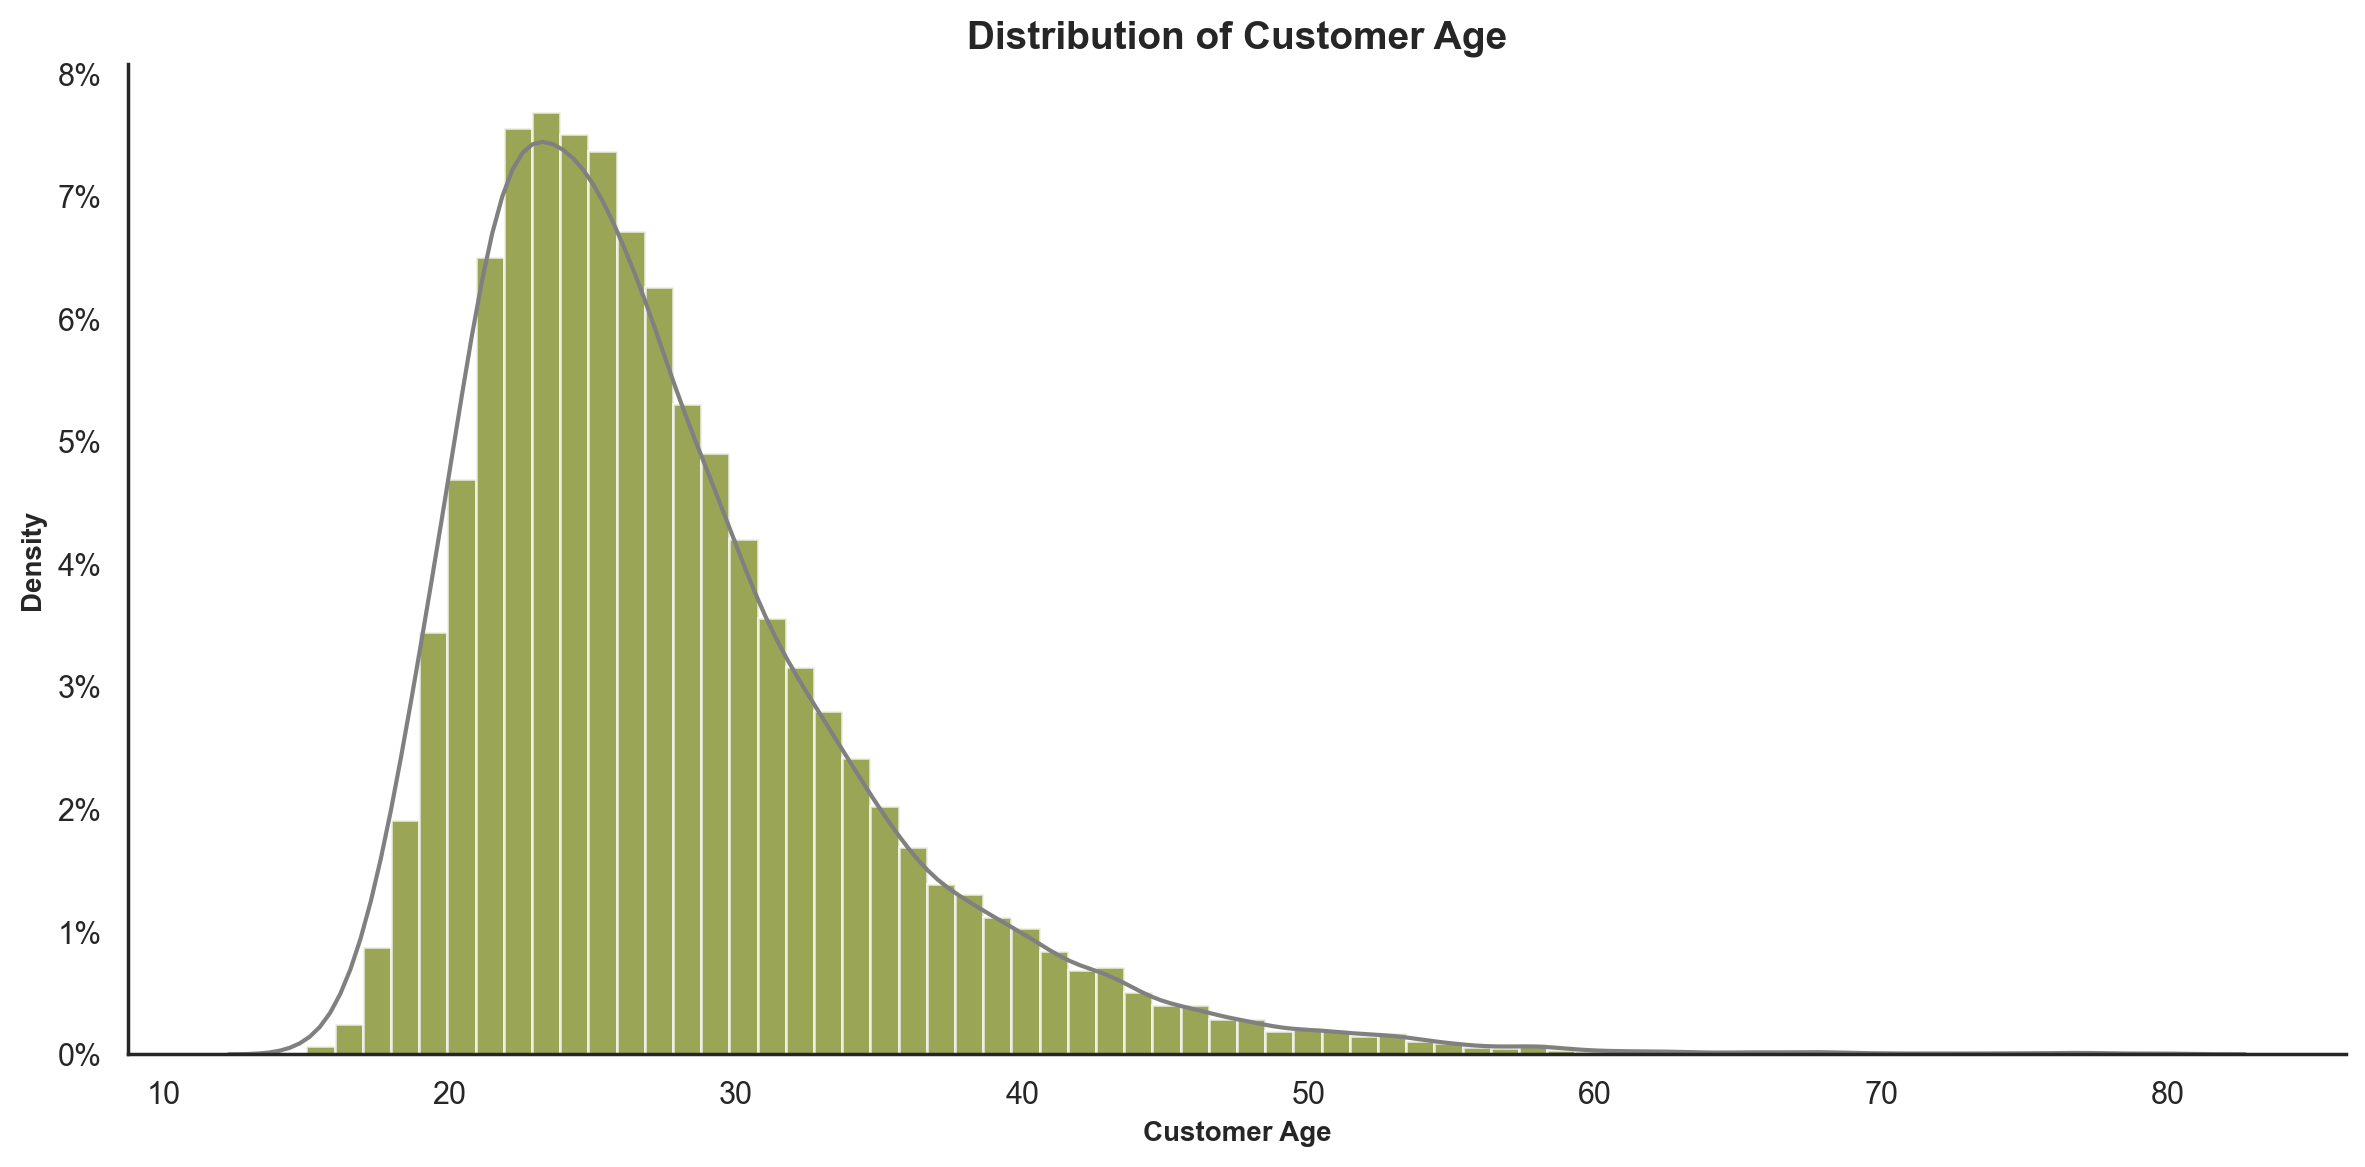

In [55]:
# Histogram of the column 'customer_age'
plt.figure(figsize=(12, 6))
plt.hist(ABCDEats['customer_age'], bins=ABCDEats['customer_age'].nunique(), color='#6f800f', alpha=0.7, density=True)
sns.kdeplot(ABCDEats['customer_age'], color='grey', lw=1.5 )
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title('Distribution of Customer Age', fontsize=14, fontweight='bold')
plt.xlabel('Customer Age', fontsize=10, fontweight='bold')
plt.ylabel('Density', fontsize=10, fontweight='bold')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

AGRUPAMENTOS:

- 14 - 17 - CHILDREN
- 18 - 23 - UNI
- 24 - 50 - WORKING MAIS 
- 51 - 64 - WORKING MAS MAIS VELHOS
- 65 - 85 - REFORMED??

We can observe that the most common clients tend to be in their 20s to 30s. This may be attributed to higher digital literacy levels in this age group, as well as the possibility that these individuals are at the beginning of their professional lives. As a result, they might experience a more stressful lifestyle, leaving them with less time to cook at home.

VER ESTUDOS QUE POSSAM FZR BACKUP DESTA INFO:
- https://www.supermarketnews.com/grocery-operations/study-why-consumers-select-takeout  isto tem mais a ver do US 
- não podemos analisar se tem alguma coisa a ver com a quarentena porque n temos datas
- https://www.statista.com/outlook/emo/online-food-delivery/worldwide#analyst-opinion

#### `vendor_count`

In [48]:
# Unique values of the column 'vendor_count'
print(sorted(map(int,ABCDEats['vendor_count'].unique())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 40, 41]


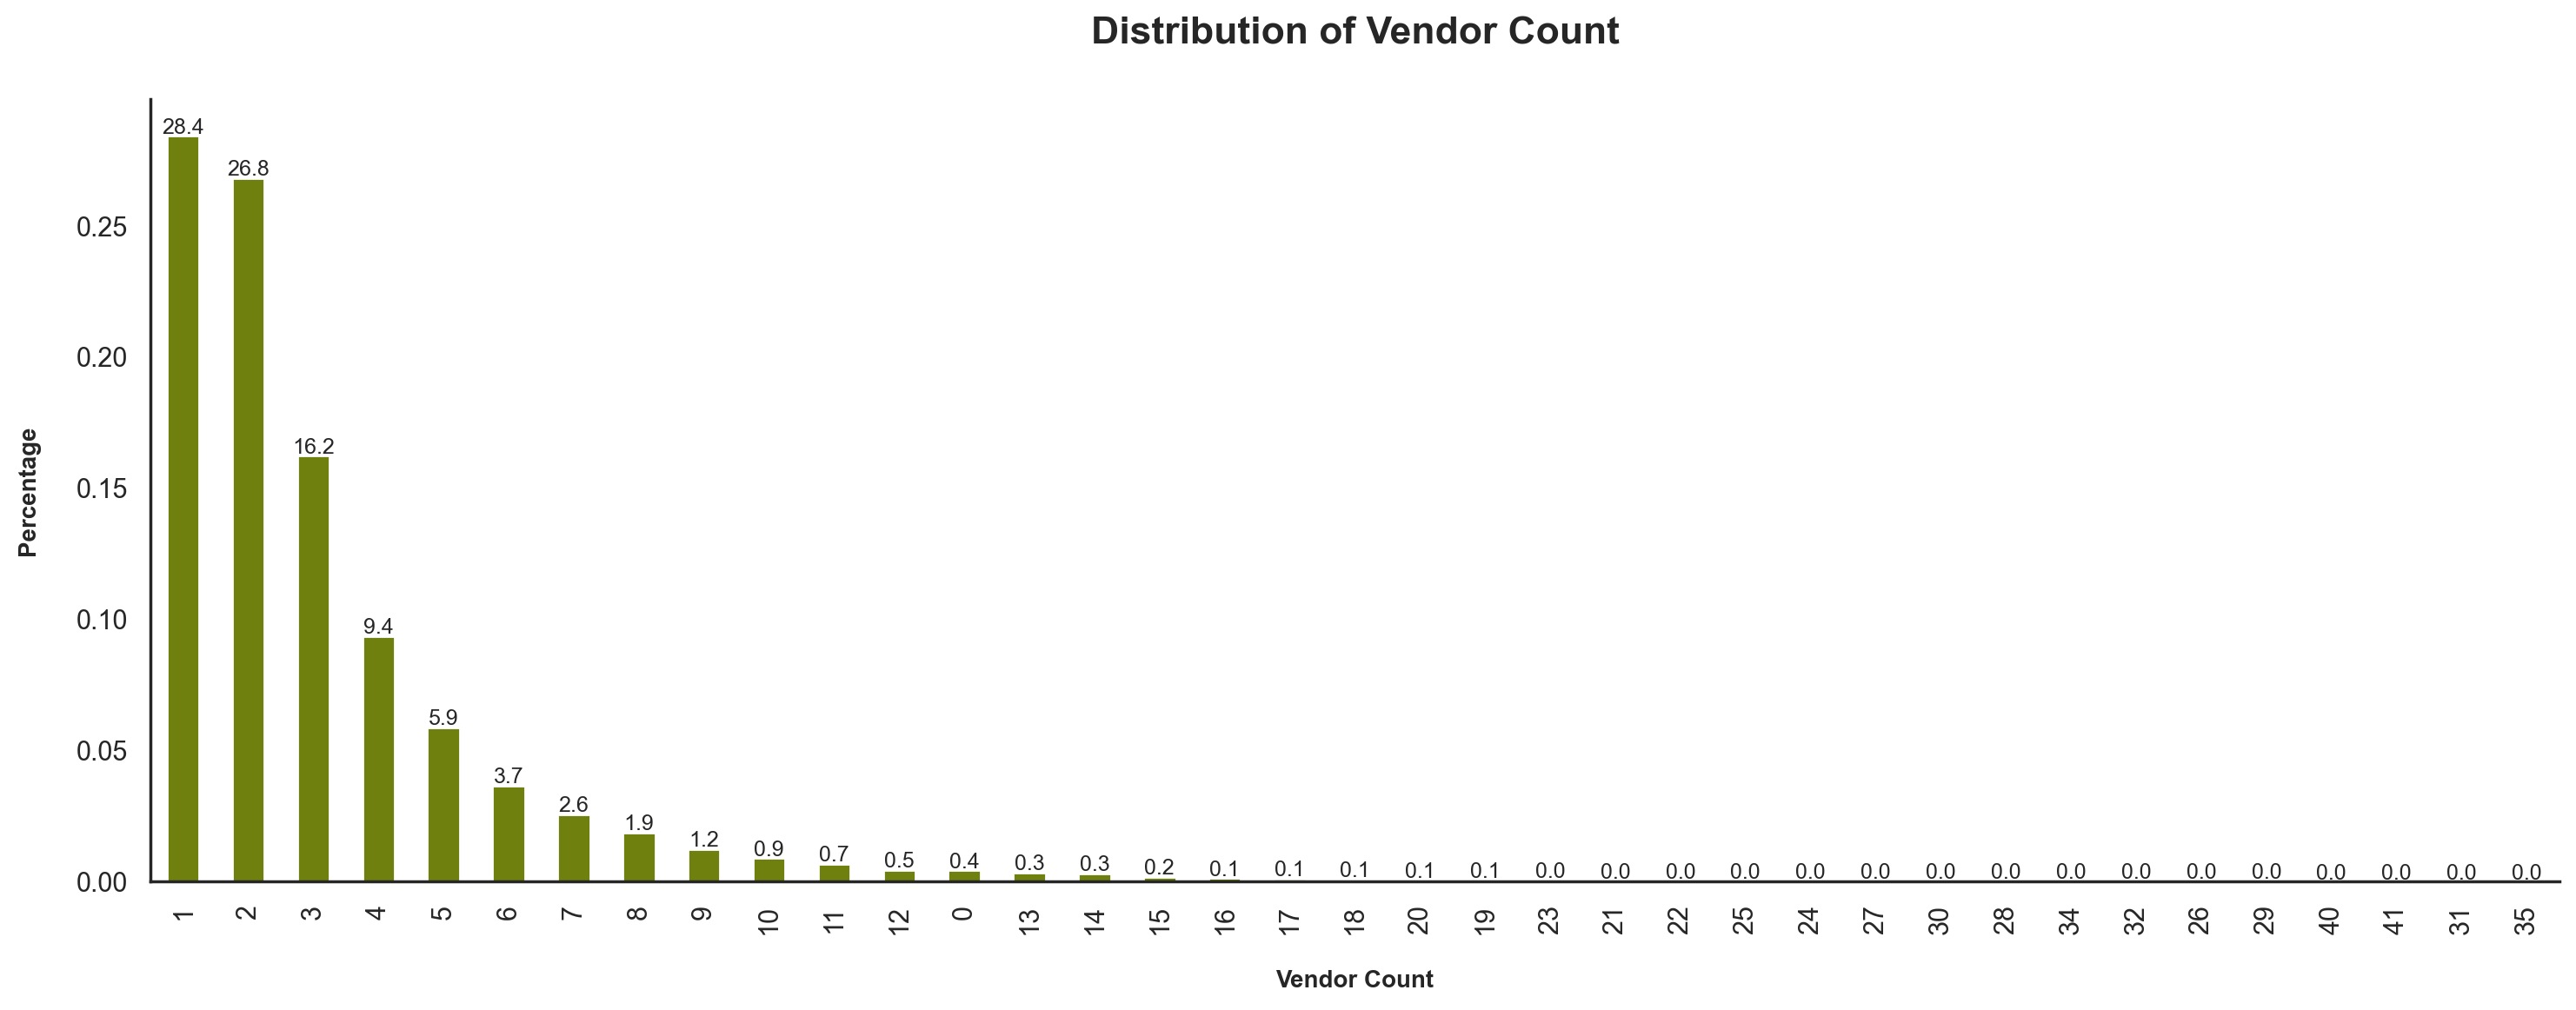

In [54]:
# Barplot representing the distribution of the vendor count
ABCDEats['vendor_count'].value_counts(normalize=True).plot(kind='bar', color='#6f800f', figsize=(15, 6))
plt.title('Distribution of Vendor Count\n', fontsize=16, fontweight='bold')
plt.xlabel('\nVendor Count', fontsize=10, fontweight='bold')
plt.ylabel('Percentage\n', fontsize=10, fontweight='bold')

# Display the percentage on the top of each bar
for i in range(len(ABCDEats['vendor_count'].value_counts(normalize=True))):
    value = ABCDEats['vendor_count'].value_counts(normalize=True).iloc[i]
    plt.text(i, value+0.001, f'{value*100:.1f}', ha='center', fontsize=9)
    
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [71]:
# # Get the top 10 most common vendor counts
# top_10_vendor_count = ABCDEats['vendor_count'].value_counts(normalize=True).head(10)
# 
# # Plot the top 10 most common 'vendor_counts'
# top_10_vendor_count.plot(kind='bar', color='#6f800f', figsize=(8, 6))
# plt.title('Distribution of Top 10 Vendor Counts', fontsize=14, fontweight='bold')
# plt.xlabel('Vendor Count', fontsize=10, fontweight='bold')
# plt.ylabel('Percentage', fontsize=10, fontweight='bold')
# for i in range(len(top_10_vendor_count)):
#     value = top_10_vendor_count.iloc[i]
#     plt.text(i, value, f'{value:.2f}', ha='center', fontsize=9)
# sns.despine(top=True, right=True)
# plt.tight_layout()
# plt.show()

To further understand the popularity of these vendors, this analysis can be complemented with information such as promos given, special campaigns, time to deliver, food quality and other customer attraction factors.

#### `product_count`

In [72]:
print(sorted(map(int,ABCDEats['product_count'].unique())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 87, 88, 89, 91, 94, 95, 97, 109, 110, 117, 269]


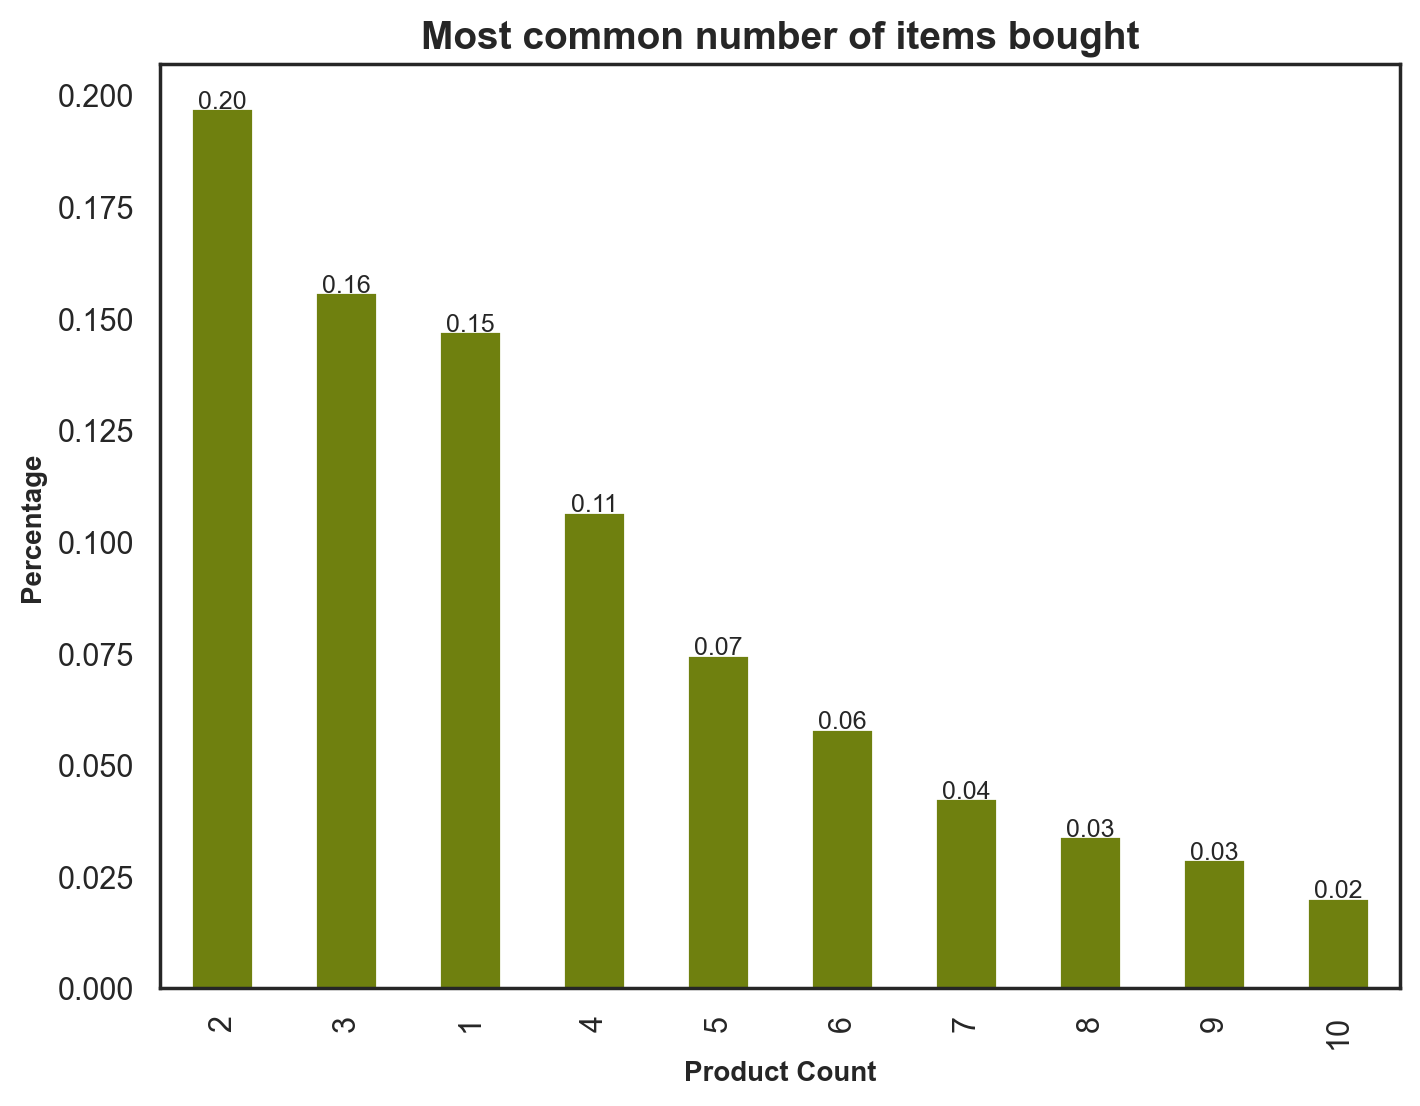

In [73]:
# most frequent product count



# Get the top 10 most common vendor counts

top_10_product_count = ABCDEats['product_count'].value_counts(normalize=True).head(10)

top_10_product_count.plot(kind='bar', color='#6f800f', figsize=(8, 6))

plt.title('Most common number of items bought', fontsize=14, fontweight='bold')
plt.xlabel('Product Count', fontsize=10, fontweight='bold')
plt.ylabel('Percentage', fontsize=10, fontweight='bold')

for i in range(len(top_10_product_count)):
    value = top_10_product_count.iloc[i]
    plt.text(i, value, f'{value:.2f}', ha='center', fontsize=9)

plt.show()

#### `is_chain`

#### `first_order`

#### `last_order`

#### `last_promo`

> The column `last_promo` has a value represented by `-` which is a 'NO PROMO'! (Assumir no relatório)

#### `payment_method`

In [74]:
# Unique values of the column 'payment_method'
ABCDEats['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

In [75]:
# Absolute and Relative Frequency Table of the column 'payment_method'
payment_method_n_freq = ABCDEats['payment_method'].value_counts().reset_index()
payment_method_n_freq.columns = ['payment_method', 'n']
payment_method_n_freq['%'] = round(payment_method_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
payment_method_n_freq.set_index('payment_method', inplace=True)
pd.DataFrame(payment_method_n_freq.sort_values(by='n', ascending=False))

,n,%
payment_method,,
CARD,20153,63.23
DIGI,6098,19.13
CASH,5624,17.64


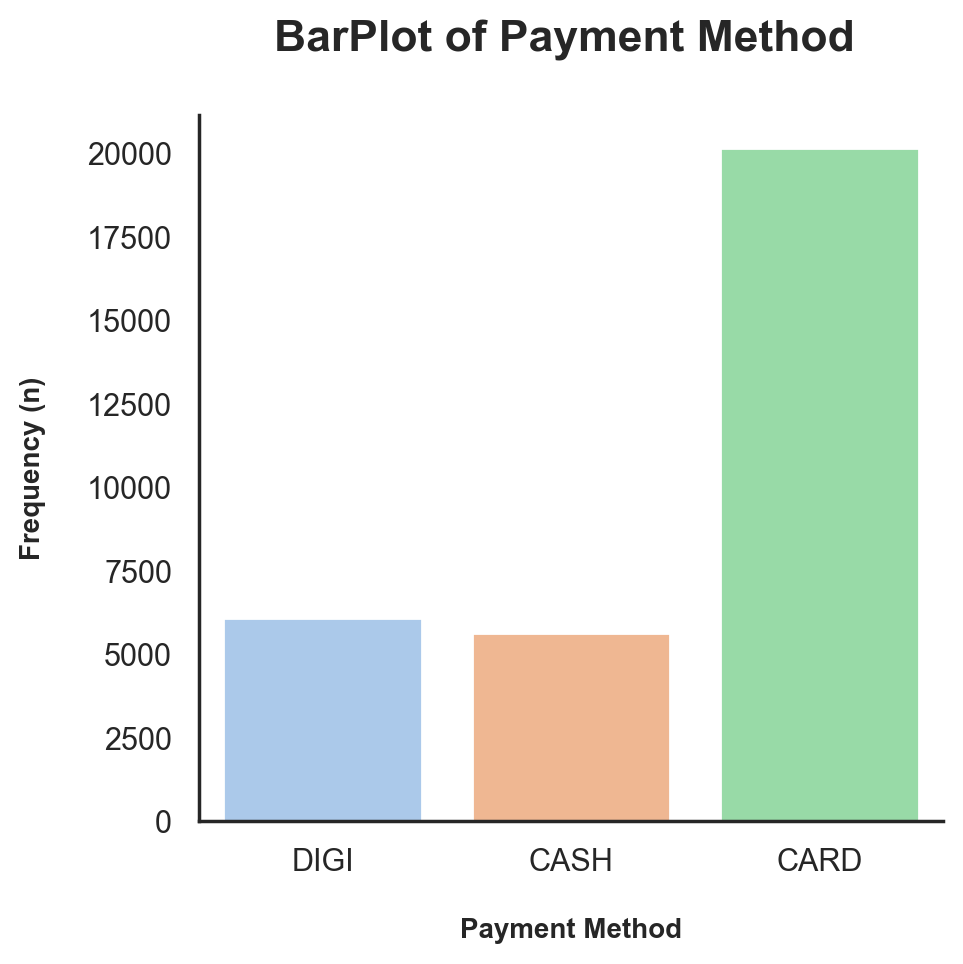

In [76]:
# Plot the absolute frequency of the column 'payment_method'
plt.figure(figsize=(5, 5))
sns.countplot(data=ABCDEats, x='payment_method', hue='payment_method', palette='pastel')
plt.title('BarPlot of Payment Method \n', fontweight='bold', fontsize=16)
plt.xlabel('\nPayment Method', fontweight='bold', fontsize=10)
plt.ylabel('Frequency (n)\n', fontweight='bold', fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

#### `CUI_American`, `CUI_Asian`, `CUI_Chinese`, `CUI_Italian`, etc.

In [77]:
# Unique values of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
cuisines = [col for col in ABCDEats.columns if 'CUI_' in col]
cuisines

['CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai']

In [84]:
# Statistics of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc. with Monetary Units > 0
round(ABCDEats[cuisines][ABCDEats[cuisines] > 0].describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
CUI_American,10791.0,14.41,16.23,0.41,5.45,9.31,18.21,280.21
CUI_Asian,11896.0,26.67,32.27,0.44,8.18,17.98,31.32,896.71
CUI_Beverages,5431.0,13.49,16.45,0.32,4.80,7.69,17.58,229.22
CUI_Cafe,1366.0,18.70,25.10,0.66,6.69,11.36,20.36,326.10
CUI_Chicken Dishes,3248.0,7.54,8.96,0.34,2.80,5.28,9.32,219.66
CUI_Chinese,3522.0,12.96,21.41,0.44,4.29,7.46,15.56,739.73
CUI_Desserts,2016.0,13.99,15.95,0.41,5.68,11.30,18.30,230.07
CUI_Healthy,2169.0,13.97,17.83,0.43,5.26,8.56,16.88,255.81
CUI_Indian,3448.0,15.09,17.59,0.46,5.58,10.18,17.72,309.07
CUI_Italian,6448.0,15.99,20.54,0.34,4.98,10.26,19.28,468.33


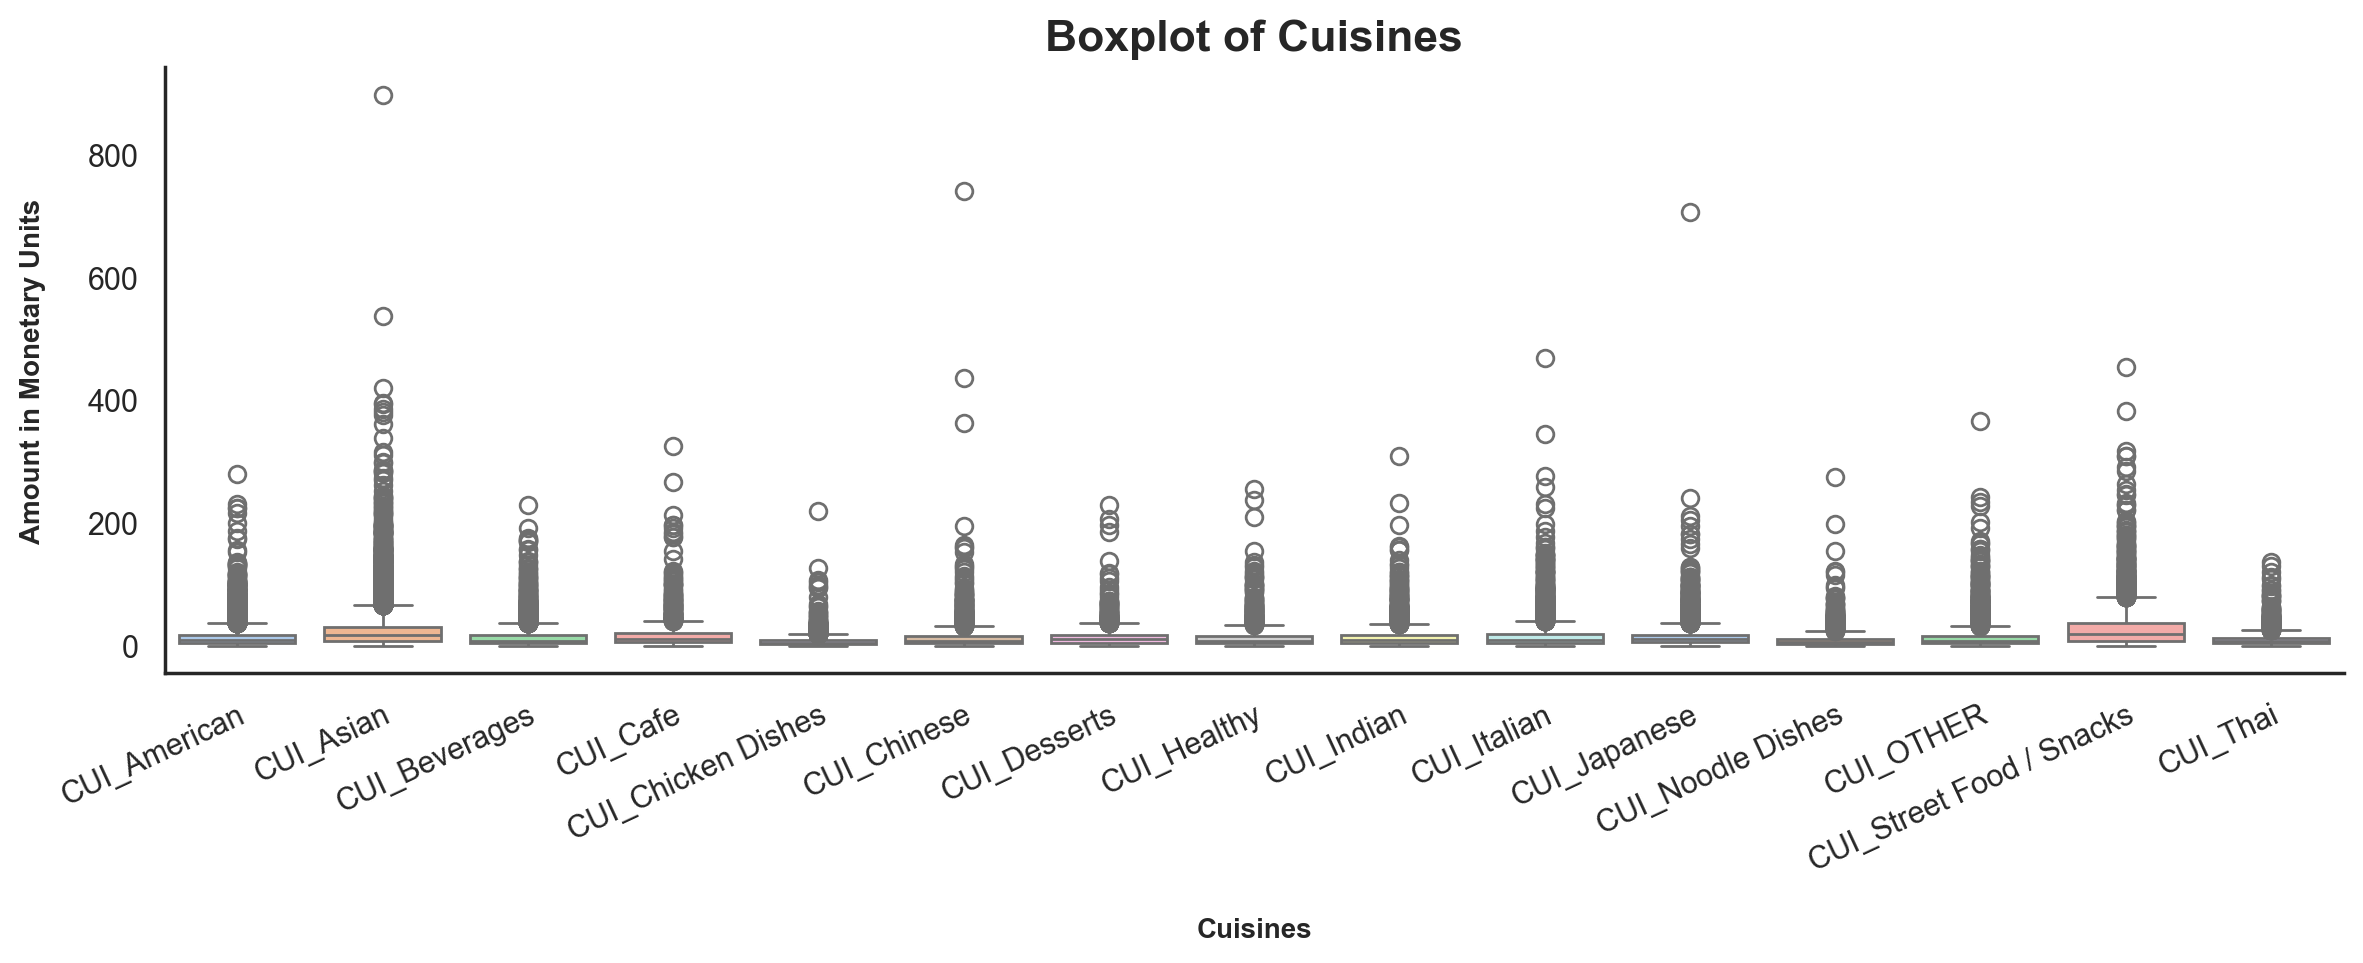

In [85]:
# Boxplot of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc. with values > 0
plt.figure(figsize=(12, 5))
sns.boxplot(data=ABCDEats[cuisines][ABCDEats[cuisines] > 0], palette='pastel')
plt.title('Boxplot of Cuisines', fontweight='bold', fontsize=16)
plt.xlabel('\nCuisines', fontweight='bold', fontsize=10)
plt.ylabel('Amount in Monetary Units\n', fontweight='bold', fontsize=10)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

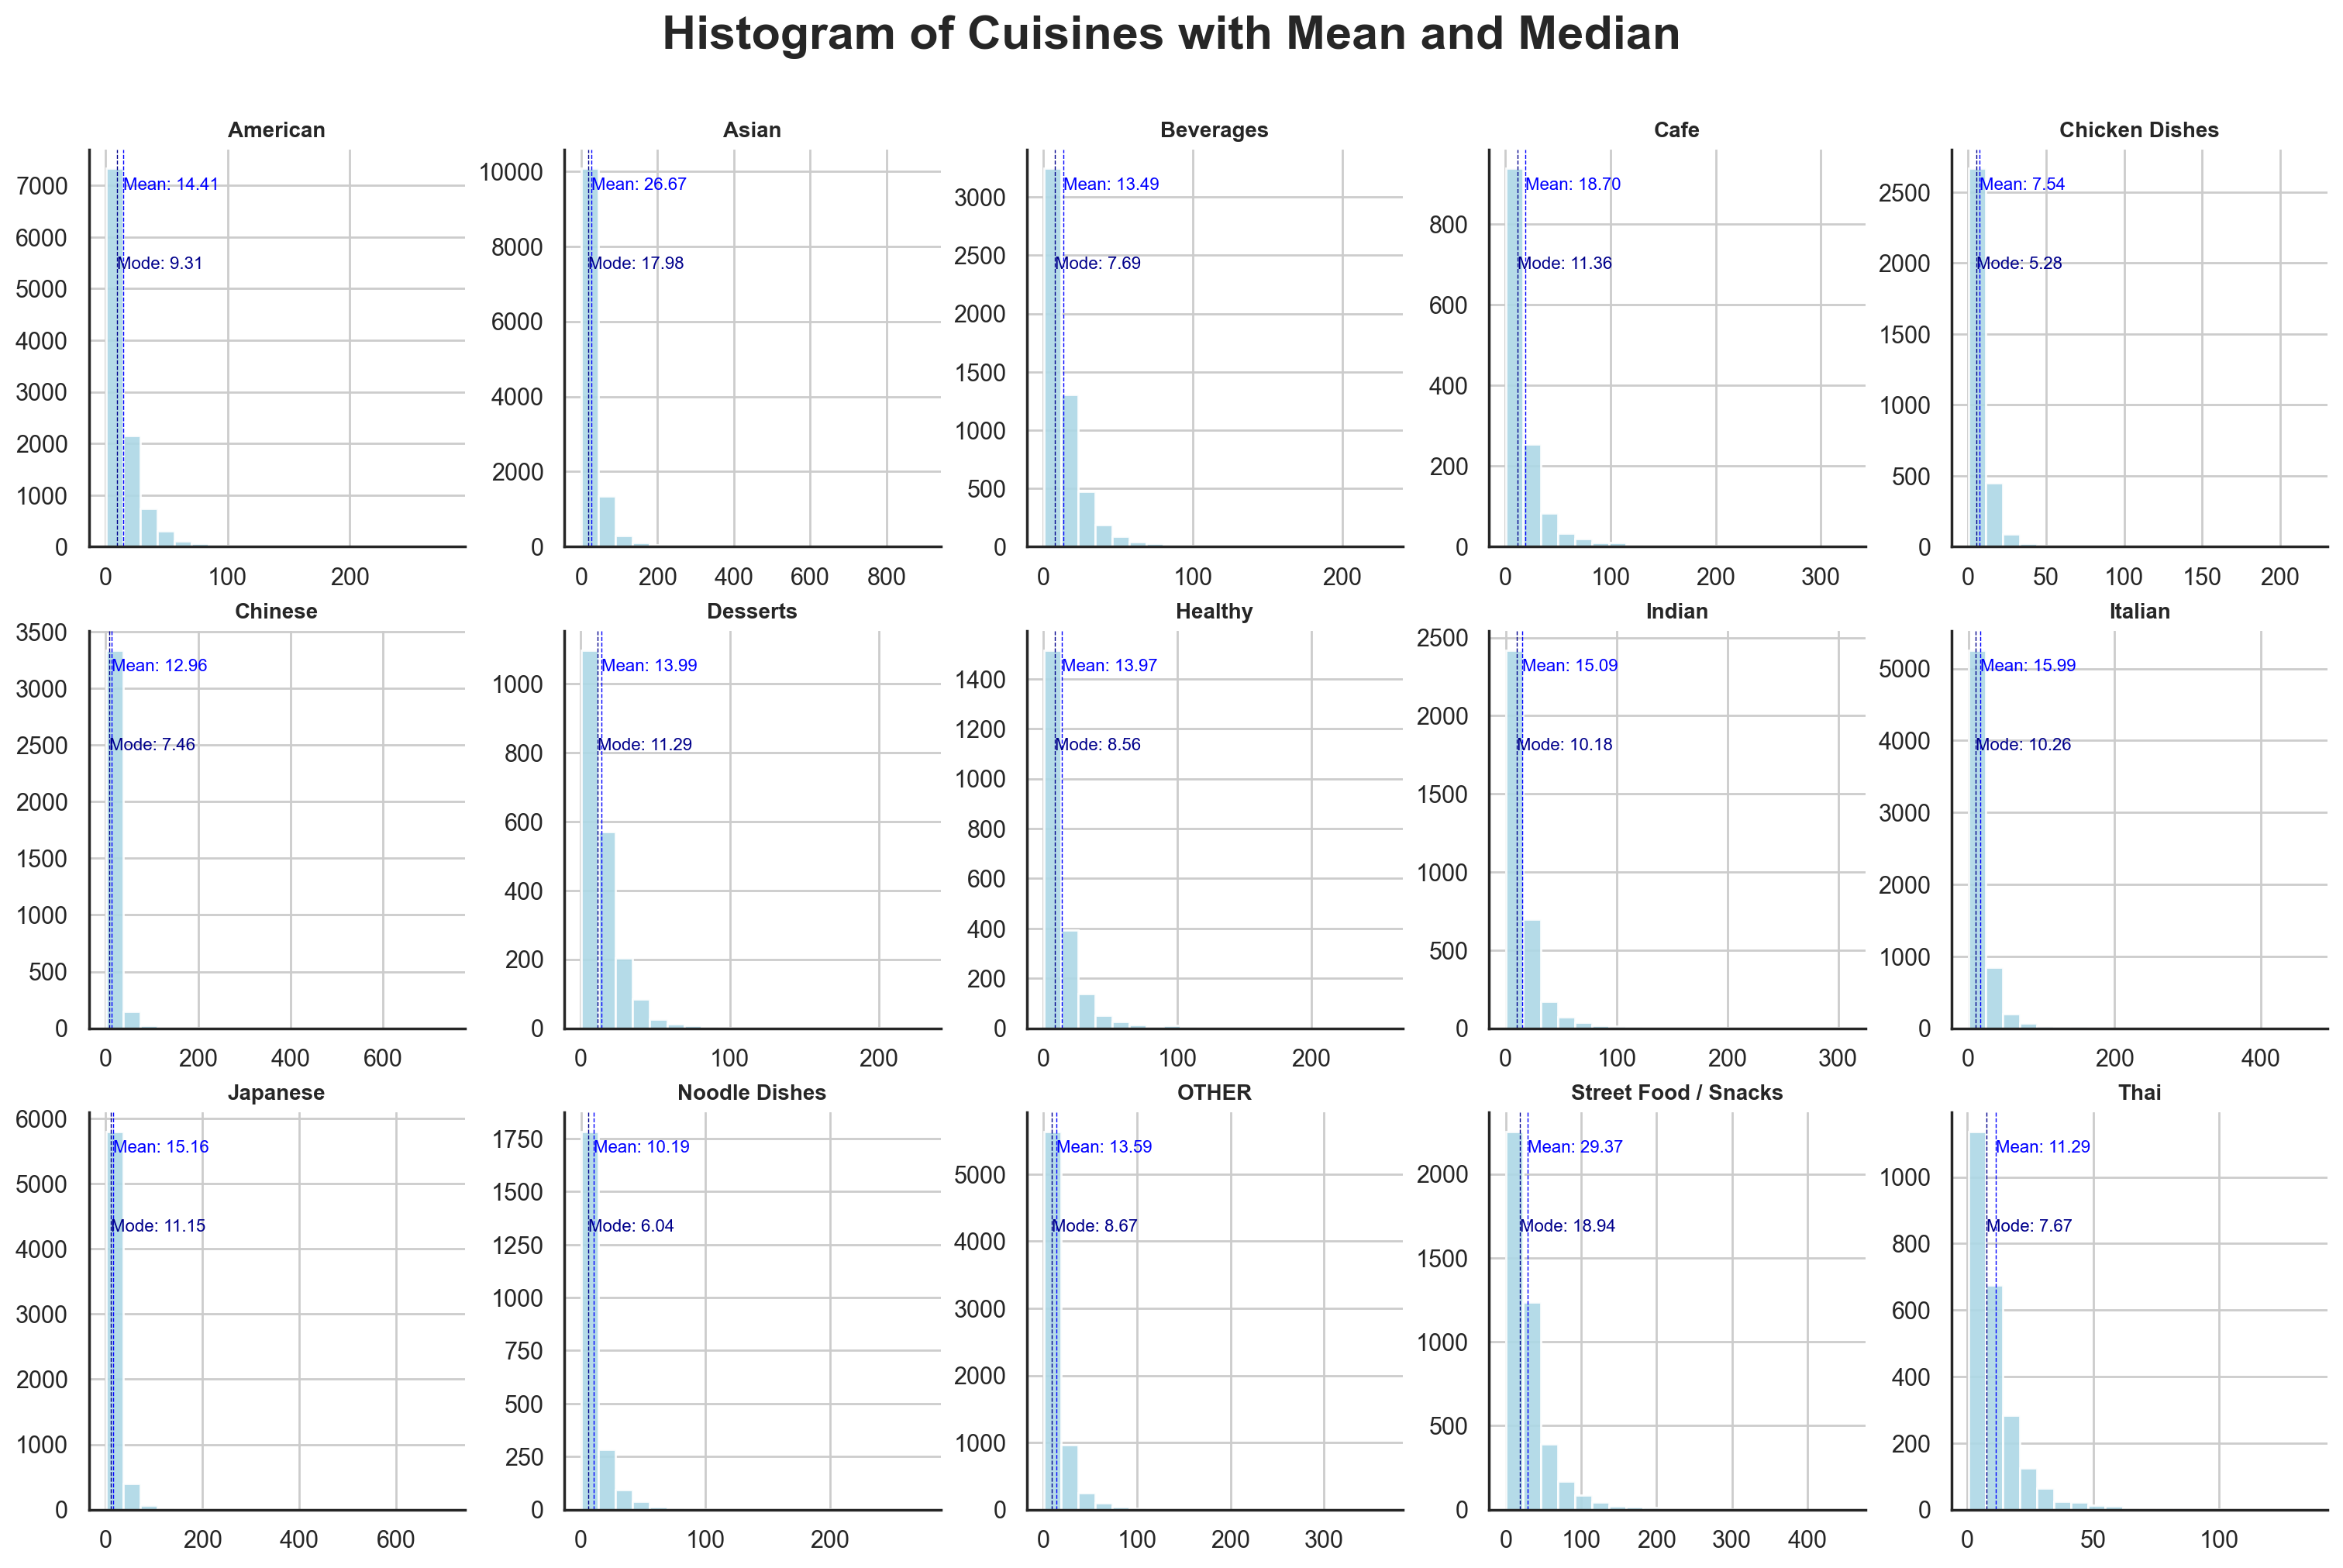

In [87]:
# Histogram with mean and mode lines for the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc. with Monetary Units > 0
fig, axes = plt.subplots(nrows=3 , ncols=5, figsize=(15, 10), constrained_layout=True)

for i, col in enumerate(cuisines):
    ax = axes[int(i / 5), i % 5] if 3 > 1 else axes[i]
    ABCDEats[col][ABCDEats[col] > 0].hist(bins=20, ax=ax, color='lightblue', alpha=0.9)

    # Calculate mean and median
    mean_val = ABCDEats[col][ABCDEats[col] > 0].mean()
    median_val = ABCDEats[col][ABCDEats[col] > 0].median()
    
    # Plot mean line
    ax.axvline(mean_val, color='blue', linestyle='dashed', linewidth=.5)
    ax.text(mean_val, ax.get_ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', color='blue', fontsize=8)
    
    # Plot median line
    ax.axvline(median_val, color='darkblue', linestyle='dashed', linewidth=.5)
    ax.text(median_val, ax.get_ylim()[1] * 0.7, f'Mode: {median_val:.2f}', color='darkblue', fontsize=8)
    
    ax.set_title(col.replace('CUI_', ''), fontweight='bold', fontsize=10)

fig.suptitle('Histogram of Cuisines with Mean and Median\n', fontweight='bold', fontsize=22)
sns.despine(top=True, right=True)
plt.show()

> Maybe we can create a new column with the total amount spent by the customer in all types of cuisine and other with the most spent cuisine by the customer (possibly the most frequent cuisine that the customer orders).

In [88]:
# Create a new column with the total amount spent by the customer in all types of cuisine
ABCDEats['CUI_Total_Amount_Spent'] = ABCDEats[cuisines].sum(axis=1)
pd.DataFrame(ABCDEats['CUI_Total_Amount_Spent'].describe())

,CUI_Total_Amount_Spent
count,31875.000000
mean,38.295857
std,46.410657
min,0.000000
25%,12.880000
50%,24.140000
75%,44.970000
max,1418.330000


In [89]:
# Create a new column with the most spent cuisine by the customer
ABCDEats['CUI_Most_Spent_Cuisine'] = ABCDEats[cuisines].idxmax(axis=1).str.replace('CUI_', '')           ###### MAL
CUI_Most_Spent_Cuisine = pd.DataFrame({
    'n': ABCDEats['CUI_Most_Spent_Cuisine'].value_counts(),
    '%': round(ABCDEats['CUI_Most_Spent_Cuisine'].value_counts() / ABCDEats.shape[0] * 100, 2)
}).sort_values(by='n', ascending=False)
CUI_Most_Spent_Cuisine.index.name = 'CUI_Most_Spent_Cuisine'
CUI_Most_Spent_Cuisine

,n,%
CUI_Most_Spent_Cuisine,,
Asian,7021,22.03
American,4308,13.52
OTHER,3134,9.83
Italian,3059,9.60
Japanese,2384,7.48
Street Food / Snacks,2289,7.18
Beverages,2058,6.46
Indian,1689,5.30
Chinese,1330,4.17


In [96]:
# How many different types of food were purchased
pd.DataFrame({
    'n': ABCDEats[cuisines].gt(0).sum(axis=1).value_counts(),
    '%': round(ABCDEats[cuisines].gt(0).sum(axis=1) / ABCDEats.shape[1] * 100, 2)
}).sort_values(by='n', ascending=False)

,n,%
1,11587.0,3.39
2,9804.0,1.69
3,5177.0,3.39
4,2564.0,3.39
5,1266.0,1.69
...,...,...
31883,NaN,1.69
31884,NaN,1.69
31885,NaN,1.69
31886,NaN,1.69


In [100]:
138/ABCDEats.shape[0]*100

0.4329411764705882

In [97]:
# Existem clientes que não compraram nenhum tipo de comida -> Analisar esses clientes
ABCDEats[ABCDEats[cuisines].gt(0).sum(axis=1) == 0]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Total_Orders,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine
1449,4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,American
1476,c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,American
1488,f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,American
2486,c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,American
3391,1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31377,177ede2420,8670,30.0,0,0,1,86.0,86,-,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,American
31553,0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,American
31667,0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,American
31680,28ed1f1e3f,8670,20.0,0,0,0,89.0,89,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,American


In [102]:
# Casos em que first_order e last_order são iguais e que temos valores de CUI_Total_Amount_Spent = 0
ABCDEats[(ABCDEats['first_order'] == ABCDEats['last_order']) & (ABCDEats['CUI_Total_Amount_Spent'] > 0)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Total_Orders,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine
1436,0d18e5416b,8670,42.0,1,1,1,1.0,1,-,DIGI,0.00,18.42,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1,0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18.42,Asian
1437,10e5701adb,8670,29.0,1,1,0,1.0,1,DELIVERY,CARD,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,19.34,0.0,0.00,0.0,0.0,1,0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19.34,Japanese
1438,1415578e02,8370,23.0,1,1,0,1.0,1,DELIVERY,CARD,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,5.91,0.0,0.00,0.0,0.0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5.91,Japanese
1439,1d02e614b4,2360,19.0,1,1,1,1.0,1,DISCOUNT,CASH,0.00,0.00,1.55,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.55,Beverages
1440,237e4e7aaf,2360,22.0,1,1,1,1.0,1,DISCOUNT,CASH,0.00,5.23,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5.23,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31777,eb13c834e7,2360,74.0,1,1,1,89.0,89,DELIVERY,CARD,0.00,0.00,0.00,0.0,1.75,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1.75,Chicken Dishes
31778,f7be3a1a84,2440,26.0,1,1,1,89.0,89,-,CASH,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1.86,0.00,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1.86,Italian
31779,fc924e1758,4660,20.0,1,2,0,89.0,89,DELIVERY,CASH,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,23.15,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,23.15,OTHER
31780,fcdbf7468b,4660,22.0,1,3,1,89.0,89,DISCOUNT,CARD,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,22.01,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,22.01,OTHER


#### `DOW_0` to `DOW_6`

In [119]:
# List of weekdays (0 = Sunday, 6 = Saturday)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']



#### `HR_0` to `HR_23`

# ########## E SE FIZER UMA MATRIZ DE CORRELAÇÃO ENTRE OS DIAS DA SEMANA E AS HORAS DO DIA??